In [2]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


In [3]:
import network_simulation as net_sims
import popconstruct as pops
import plotting_helper_functions as plt_help
import pandas as pd
import os
import time
import pdb

import pylab as pl
import pickle
import numpy as np
import pandas as pd
import pingouin
import sklearn 
import warnings

warnings.filterwarnings("ignore")

def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

data_dir = "./Data/weights_analysis/"
figure_dir = "./Figures/weights_analysis/"

2023-08-04 10:44:13,569	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-08-04 10:44:13,576	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


In [4]:
solutions = np.arange(0.02, 0.64, 0.1) #np.arange(0.02, 1.1, 0.2)
print(len(solutions))
print(solutions)

7
[0.02 0.12 0.22 0.32 0.42 0.52 0.62]


# Plots

### Datatables

In [5]:
datatables_gpea = pd.DataFrame()

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'1chann-old/network_data_1chann-old_GPeA-D1_GPeA-only_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA-D1'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' else 0 for x in temp.decision]
        temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables_gpea = datatables_gpea.append(temp, ignore_index = False)

datatables_gpea['GPeA-D1'] = np.round(datatables_gpea['GPeA-D1'].values, 3)
#saveresults_vars(datatables_all, data_dir+'1chann-old/datatables_all')

In [ ]:
datatables_gpea

In [6]:
datatables_all = pickle.load(open(data_dir+'1chann-old/datatables_all', 'rb'))
datatables_stn = pickle.load(open(data_dir+'1chann-old/datatables_stn', 'rb'))

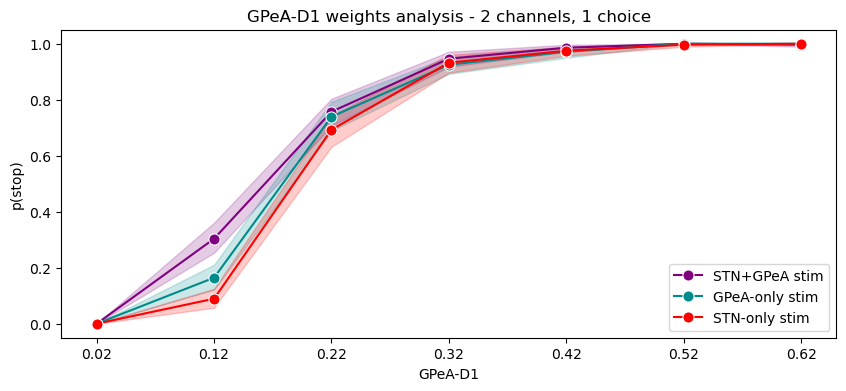

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.lineplot(data=datatables_all, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='purple', label='STN+GPeA stim')
sns.lineplot(data=datatables_gpea, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='darkcyan', label='GPeA-only stim')
sns.lineplot(data=datatables_stn, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='red', label='STN-only stim')


ax.legend(loc='lower right')
ax.set_xticks(np.arange(0.02, 0.64, 0.1))
#ax.set(ylim=(0,1))
ax.set_ylabel('p(stop)')
plt.title('GPeA-D1 weights analysis - 2 channels, 1 choice')
plt.savefig(figure_dir+'D1-weight_analysis_comparison_1chann-old')

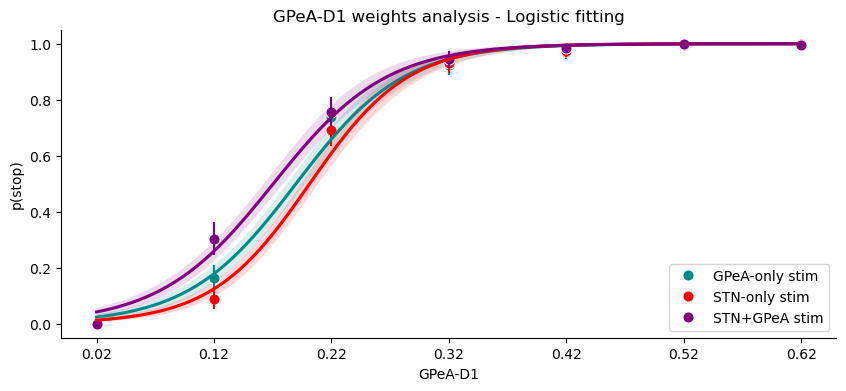

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

sns.lineplot(data=datatables_gpea, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='darkcyan', linestyle='', err_style='bars')
sns.lineplot(data=datatables_stn, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='red', linestyle='', err_style='bars')
sns.lineplot(data=datatables_all, x='GPeA-D1', y='num_stops', ax = ax, marker='o',
             markersize=8, color='purple', linestyle='', err_style='bars')

sns.regplot(x='GPeA-D1', y='num_stops', data=datatables_gpea, logistic=True, ci=95, ax=ax, 
           color='darkcyan', marker='', label='GPeA-only stim')
sns.regplot(x='GPeA-D1', y='num_stops', data=datatables_stn, logistic=True, ci=95, ax=ax, 
           color='red', marker='', label='STN+GPeA stim')
sns.regplot(x='GPeA-D1', y='num_stops', data=datatables_all, logistic=True, ci=95, ax=ax, 
           color='purple', marker='', label='STN+GPeA stim')

ax.legend(['GPeA-only stim', 'STN-only stim', 'STN+GPeA stim'], loc='lower right')
ax.set_xticks(np.arange(0.02, 0.64, 0.1))
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('p(stop)')
plt.title('GPeA-D1 weights analysis - Logistic fitting')
plt.savefig(figure_dir+'D1-weight_analysis_logistic_1chann-old')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.boxplot(data=datatables_D1, x='GPeA-D1', y='p_stop', ax = ax)
#ax.set(ylim=(0,1))
plt.title('GPeA-D1 weights analysis - STN+GPeA stimulation')
plt.savefig(figure_dir+'D1-weight_analysis_STN+GPeA_box')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.violinplot(data=datatables_D1, x='GPeA-D1', y='p_stop', ax = ax)
#ax.set(ylim=(0,1))
plt.title('GPeA-D1 weights analysis - STN+GPeA stimulation')
plt.savefig(figure_dir+'D1-weight_analysis_STN+GPeA_violin')

In [ ]:
datatables_all

In [11]:
datatables_all_ind = datatables_all.reset_index()
datatables_all_ind.index

datatables_stn_ind = datatables_stn.reset_index()
datatables_stn_ind.index

datatables_gpea_ind = datatables_gpea.reset_index()
datatables_gpea_ind.index

RangeIndex(start=0, stop=1960, step=1)

In [12]:
repo_all = pd.DataFrame()
for i in datatables_all_ind.index:
    if datatables_all_ind.decision.iloc[i] != 'stop':
        repo_all = repo_all.append(datatables_all_ind.iloc[i]) #'mediumseagreen'

repo_stn = pd.DataFrame()
for i in datatables_stn_ind.index:
    if datatables_stn_ind.decision.iloc[i] != 'stop':
        repo_stn = repo_stn.append(datatables_stn_ind.iloc[i]) #'mediumseagreen'

repo_gpea = pd.DataFrame()
for i in datatables_gpea_ind.index:
    if datatables_gpea_ind.decision.iloc[i] != 'stop':
        repo_gpea = repo_gpea.append(datatables_gpea_ind.iloc[i]) #'mediumseagreen'


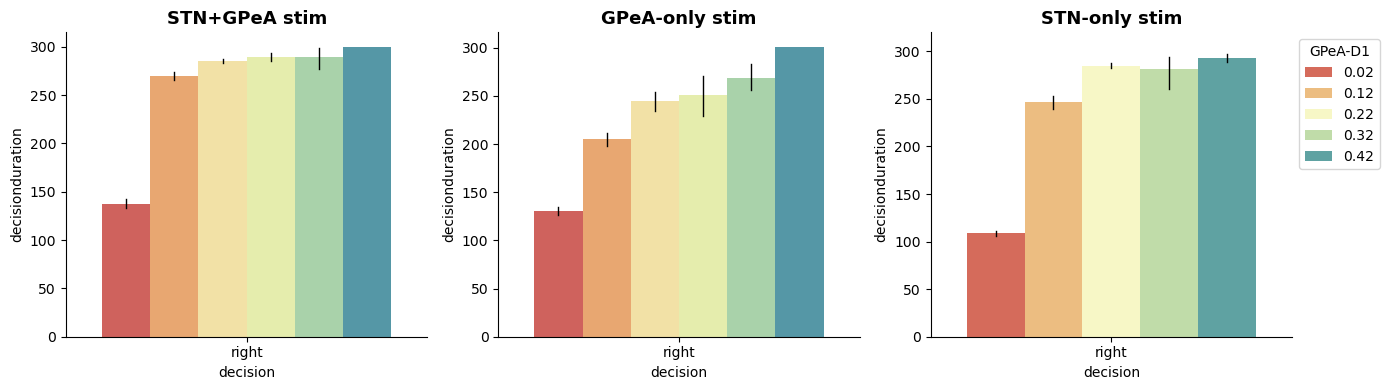

In [53]:
fig, ax = plt.subplots(1,3, figsize=(14, 4), tight_layout=True)

sns.barplot(data=repo_all, x='decision', y='decisionduration', hue='GPeA-D1', n_boot=1000, palette="Spectral", errwidth=1, errcolor='black', ax=ax[0])
ax[0].set_title('STN+GPeA stim', weight='bold', fontsize=13.)
sns.barplot(data=repo_stn, x='decision', y='decisionduration', hue='GPeA-D1', n_boot=1000, palette="Spectral", errwidth=1, errcolor='black', ax=ax[1])
ax[1].set_title('GPeA-only stim', weight='bold', fontsize=13.)
sns.barplot(data=repo_gpea, x='decision', y='decisionduration', hue='GPeA-D1', n_boot=1000, palette="Spectral", errwidth=1, errcolor='black', ax=ax[2])
ax[2].set_title('STN-only stim', weight='bold', fontsize=13.)

plt.ylim(0, 320)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)
plt.savefig(figure_dir+'RTs_weights_1chann-old')

### Mean firing

In [ ]:
firing_D1 = pd.DataFrame()

for i in np.arange(len(solutions)): 
    
    net_D1 = pickle.load(open(data_dir+'/network_data_GPeA-D1_GPeA-only_'+str(i), 'rb'))
    
    for j in np.arange(len(net_D2)):
        
        temp = plt_help.rename_columns(net_D1[j])['popfreqs']
        temp['GPeA-D1'] = solutions[i]
        firing_D1_only = firing_D1.append(temp)
        
firing_D1['GPeA-D1'] = np.round(firing_D1['GPeA-D1'].values, 2)
saveresults_vars(firing_D1, data_dir+'firing_D1')

In [ ]:
firing_D1

In [ ]:
#During whole phases of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.pointplot(data=firing_D1, x='GPeA-D1', y='D1STR_right', errorbar="sd", ax = ax, color='mediumseagreen')
#ax.set(ylim=(0,1))
ax.set_ylabel('mean FR')
plt.title('D1STR FR as a function of GPeA-D1STR synaptic weight - All phases')
plt.savefig(figure_dir+'D1-weight_analysis_D1STR-FR')

In [ ]:
firing_stn = pd.DataFrame()

#input_channels = ['CxI_common', 'Cx_left', 'Cx_right', 'D1STR_left', 'D1STR_right',
                  #'D2STR_left', 'D2STR_right', 'FSI_common', 'GPeP_left',
                  #'GPeP_right', 'GPeA_left','GPeA_right','GPi_left', 'GPi_right', 
                  #'STNE_left', 'STNE_right', 'Th_left', 'Th_right']
input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']


for i in np.arange(len(solutions)): 
    
    net_D1 = pickle.load(open(data_dir+'1chann-new/network_data_1chann-new_GPeA-D1_STN-only_'+str(i), 'rb'))
    
    for j in np.arange(len(net_D1)):

        helper = plt_help.rename_columns(net_D1[j])['popfreqs']
        
        datatabs = net_D1[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime'],datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"].append(dt-ss)
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                #print(dat_slice)
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch].append(dat_slice.mean())
        #print(temp)

        temp = pd.DataFrame(temp)
        temp['GPeA-D1'] = solutions[i]
        firing_stn = firing_stn.append(temp, ignore_index=True)
        
firing_stn['GPeA-D1'] = np.round(firing_stn['GPeA-D1'].values, 2)
saveresults_vars(firing_stn, data_dir+'1chann-new/firing_stn')

In [6]:
firing_stn = pickle.load(open(data_dir+'1chann-new/firing_stn', 'rb'))
firing_gpea = pickle.load(open(data_dir+'1chann-new/firing_gpea', 'rb'))
firing_all = pickle.load(open(data_dir+'1chann-new/firing_all', 'rb'))

In [ ]:
#During whole phase 0 of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='FSI_common', ax = ax, 
             marker='o', markersize=8, color='darkgreen', label='FSI - STN+GPeA stim') #'yellowgreen'
#sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='D2STR_left', ax = ax, 
             #marker='o', markersize=8, color='darkorange', label='D2STR-left - STN+GPeA stim') #'yellowgreen'

sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='FSI_common', ax = ax, 
             marker='o', markersize=8, color='limegreen', label='FSI - GPeA-only') #'yellowgreen'
#sns.lineplot(data=firing_D2_phase01_only, x='GPeA-D2', y='D2STR_left', ax = ax, 
             #marker='o', markersize=8, color='orange', label='D2STR-left - GPeA-only') #'yellowgreen'

#ax.set(ylim=(0,1))
ax.legend()
ax.set_xticks(np.arange(0.02, 1.44, 0.2))
ax.set_ylabel('FSI mean FR')
plt.title('FSI FR as function of GPeA-FSI synaptic weight - Phase0')
plt.savefig(figure_dir+'FSI-weight_analysis_FSI-FR_phase0_comparison')

In [ ]:
#During whole phase 0 of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.lineplot(data=firing_D1_phase01, x='GPeA-D1', y='D2STR_right', ax = ax, 
             marker='o', markersize=8, color='steelblue', label='D2STR-right') #'yellowgreen'
sns.lineplot(data=firing_D1_phase01, x='GPeA-D1', y='D2STR_left', ax = ax, 
             marker='o', markersize=8, color='orange', label='D2STR-left') #'yellowgreen'
ax.set(ylim=(0,11))
ax.legend()
ax.set_xticks(np.arange(0.02, 1.44, 0.2))
ax.set_ylabel('D2STR mean FR')
plt.title('D2STR FR as a function of GPeA-D1STR synaptic weight - Phase0 - STN+GPeA stimulation')
plt.savefig(figure_dir+'D1-weight_analysis_D2STR-FR_phase0_STN+GPeA')

In [ ]:
#During whole phase 0 of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.lineplot(data=firing_D1_phase01, x='GPeA-D1', y='FSI_common', ax = ax, 
             marker='o', markersize=8, color='green', label='FSI') #'yellowgreen'
ax.set(ylim=(0,14))
ax.legend()
ax.set_xticks(np.arange(0.02, 1.44, 0.2))
ax.set_ylabel('FSI mean FR')
plt.title('FSI FR as a function of GPeA-D1STR synaptic weight - Phase0 - STN+GPeA stimulation')
plt.savefig(figure_dir+'D1-weight_analysis_FSI-FR_phase0_STN+GPeA')

In [ ]:
#Total number of trials 
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.pointplot(data=firing_D1_phase01, x='GPeA-D1', y='reaction_time', ax = ax, color='orange') #'yellowgreen'

ax.set_ylabel('Reaction times')
plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'D1-weight_analysis_RTs-distribution_STN+GpeA_new')

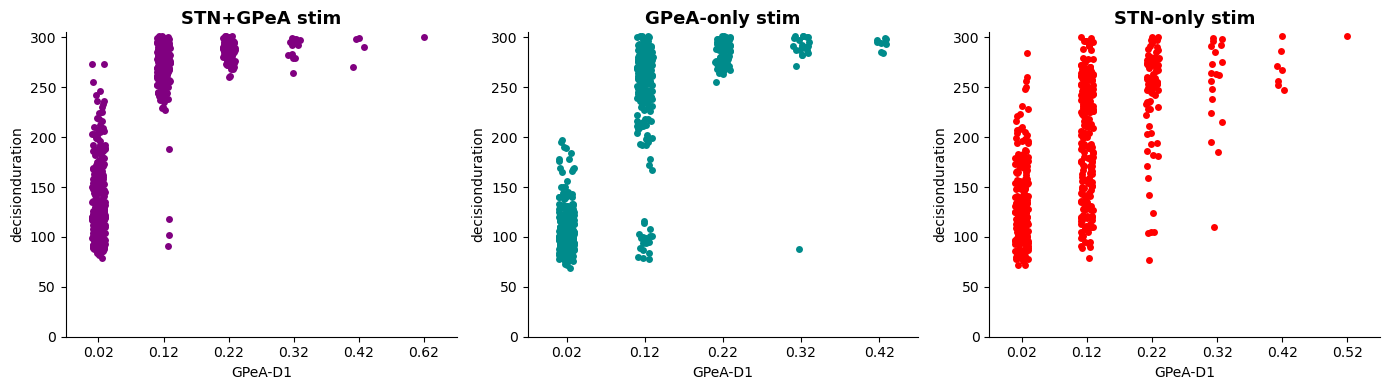

In [17]:
#Total number of trials (correct + failed)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14,4), tight_layout=True)
sns.stripplot(data=repo_all, x='GPeA-D1', y='decisionduration', ax = ax[0], color='purple', label='STN+GPeA stim') 
sns.stripplot(data=repo_gpea, x='GPeA-D1', y='decisionduration', ax = ax[1], color='darkcyan', label='GPeA-only stim') 
sns.stripplot(data=repo_stn, x='GPeA-D1', y='decisionduration', ax = ax[2], color='red', label='STN-only stim') 

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

ax[0].set_title('STN+GPeA stim', weight='bold', fontsize=13.)
ax[1].set_title('GPeA-only stim', weight='bold', fontsize=13.)
ax[2].set_title('STN-only stim', weight='bold', fontsize=13.)

#sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)

ax[0].set_ylim(0, 305, 50)
ax[1].set_ylim(0, 305, 50)
ax[2].set_ylim(0, 305, 50)


plt.savefig(figure_dir+'D1-weight_analysis_RTtrialwise_1chann-old')
plt.show()

In [ ]:
#Total number of trials (correct + failed)
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=firing_D1_phase01_only, x='GPeA-D1', y='reaction_time', ax = ax, color='darkcyan', label='GPeA-only stim') 
#ax.set(ylim=(0,1))
#plt.legend()
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
#plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[10].set_bbox(dict(facecolor="red", alpha=0.3))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
plt.legend(['GPeA-only stim'], loc='lower right')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'D1-weight_analysis_GPeA-only_RTs')
plt.show()

In [ ]:
failed_stops_only = pd.DataFrame()

for i in firing_D1_phase01_only.index:
    
    if firing_D1_phase01_only.iloc[i].reaction_time < 300: 
    
        failed_stops_only = failed_stops_only.append(firing_D1_phase01_only.iloc[i])   

In [ ]:
#Failed trials
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=failed_stops, x='GPeA-D1', y='reaction_time', ax = ax, color='purple', label='STN+GPeA stim') 
#ax.set(ylim=(0,1))
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[10].set_bbox(dict(facecolor="red", alpha=0.15))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
plt.legend(['STN+GPeA stim - Failed'], loc='lower right')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'D1-weight_analysis_STN+GPeA_RTs_failed')
plt.show()

In [ ]:
#Failed trials
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=failed_stops_only, x='GPeA-D1', y='reaction_time', ax = ax, color='darkcyan', label='STN+GPeA stim') 
#ax.set(ylim=(0,1))
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[10].set_bbox(dict(facecolor="red", alpha=0.15))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
plt.legend(['GPeA-only stim - Failed'], loc='lower right')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'D1-weight_analysis_GPeA-only_RTs_failed')
plt.show()

In [ ]:
#Total number of trials (correct + failed)
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=firing_D1_phase01, x='GPeA-D1', y='reaction_time', ax = ax, color='purple', label='STN+GPeA stim') 
#ax.set(ylim=(0,1))
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[10].set_bbox(dict(facecolor="red", alpha=0.15))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
plt.legend(['STN+GPeA stim'], loc='lower right')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'D1-weight_analysis_STN+GPeA_RTs')
plt.show()

In [ ]:
firing_D1_phase01.index

In [ ]:
failed_stops

In [ ]:
#During whole phase 0 of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.pointplot(data=failed_stops, x='GPeA-D1', y='reaction_time', ax = ax, color='orange') #'yellowgreen'

ax.set_ylabel('Reaction times')
plt.title('RTs as a function of GPeA-D1STR synaptic weight - Failed stops only')
plt.savefig(figure_dir+'D1-weight_analysis_RTs-distribution_Failed_STN+GPeA_new')

In [ ]:
#Failed stop trials only 
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=failed_stops, x='GPeA-D1', y='reaction_time', ax = ax) 
#ax.set(ylim=(0,1))
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
#plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight - Failed stops only')
plt.savefig(figure_dir+'D1-weight_analysis_RTs_catplot_Failed_STN+GPeA_new')
plt.show()

In [ ]:
#During whole phase 0 of the trial
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3,4, figsize=(26, 14), tight_layout=True)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='Cx_left', ax = ax1[0], color='darkorange', marker='o', label='Cx-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='Cx_right', ax = ax1[0], color='darkblue', marker='o', label='Cx-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='Cx_left', ax = ax1[0], color='orange', marker='o', label='Cx-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='Cx_right', ax = ax1[0], color='steelblue', marker='o', label='Cx-right - GPeA-only') #'yellowgreen'
ax1[0].legend()
ax1[0].set_ylabel('Mean FRs - Phase 0', fontsize=12.)
ax1[0].set_title('Cx', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='CxI_common', ax = ax1[1], color='darkgreen', marker='o', label='CxI - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='CxI_common', ax = ax1[1], color='limegreen', marker='o', label='CxI - GPeA-only') #'yellowgreen'
ax1[1].legend()
ax1[1].set_ylabel('')
ax1[1].set_title('CxI', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='FSI_common', ax = ax1[2], color='darkgreen', marker='o', label='FSI - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='FSI_common', ax = ax1[2], color='limegreen', marker='o', label='FSI - GPeA-only') #'yellowgreen'
ax1[2].legend()
ax1[2].set_ylabel('')
ax1[2].set_title('FSI', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPeP_left', ax = ax2[0], color='darkorange', marker='o', label='GPeP-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPeP_right', ax = ax2[0], color='darkblue', marker='o', label='GPeP-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPeP_left', ax = ax2[0], color='orange', marker='o', label='GPeP-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPeP_right', ax = ax2[0], color='steelblue', marker='o', label='GPeP-right - GPeA-only') #'yellowgreen'
ax2[0].legend()
ax2[0].set_ylabel('Mean FRs - Phase 0', fontsize=12.)
ax2[0].set_title('GPeP', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPeA_left', ax = ax2[1], color='darkorange', marker='o', label='GPeA-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPeA_right', ax = ax2[1], color='darkblue', marker='o', label='GPeA-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPeA_left', ax = ax2[1], color='orange', marker='o', label='GPeA-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPeA_right', ax = ax2[1], color='steelblue', marker='o', label='GPeA-right - GPeA-only') #'yellowgreen'
ax2[1].legend()
ax2[1].set_ylabel('')
ax2[1].set_title('GPeA', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='D2STR_left', ax = ax2[2], color='darkorange', marker='o', label='iSPN-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='D2STR_right', ax = ax2[2], color='darkblue', marker='o', label='iSPN-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='D2STR_left', ax = ax2[2], color='orange', marker='o', label='iSPN-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='D2STR_right', ax = ax2[2], color='steelblue', marker='o', label='iSPN-right - GPeA-only') #'yellowgreen'
ax2[2].legend()
ax2[2].set_ylabel('')
ax2[2].set_title('iSPN', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='D1STR_left', ax = ax2[3], color='darkorange', marker='o', label='dSPN-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='D1STR_right', ax = ax2[3], color='darkblue', marker='o', label='dSPN-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='D1STR_left', ax = ax2[3], color='orange', marker='o', label='dSPN-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='D1STR_right', ax = ax2[3], color='steelblue', marker='o', label='dSPN-right - GPeA-only') #'yellowgreen'
ax2[3].legend()
ax2[3].set_ylabel('')
ax2[3].set_title('dSPN', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='STNE_left', ax = ax3[0], color='darkorange', marker='o', label='STN-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='STNE_right', ax = ax3[0], color='darkblue', marker='o', label='STN-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='STNE_left', ax = ax3[0], color='orange', marker='o', label='STN-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='STNE_right', ax = ax3[0], color='steelblue', marker='o', label='STN-right - GPeA-only') #'yellowgreen'
ax3[0].legend()
ax3[0].set_ylabel('Mean FRs - Phase 0', fontsize=12.)
ax3[0].set_title('STN', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPi_left', ax = ax3[1], color='darkorange', marker='o', label='GPi-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='GPi_right', ax = ax3[1], color='darkblue', marker='o', label='GPi-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPi_left', ax = ax3[1], color='orange', marker='o', label='GPi-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='GPi_right', ax = ax3[1], color='steelblue', marker='o', label='GPi-right - GPeA-only') #'yellowgreen'
ax3[1].legend()
ax3[1].set_ylabel('')
ax3[1].set_title('GPi', weight="bold", fontsize=16)

sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='Th_left', ax = ax3[2], color='darkorange', marker='o', label='Th-left - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01, x='GPeA-FSI', y='Th_right', ax = ax3[2], color='darkblue', marker='o', label='Th-right - STN+GPeA') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='Th_left', ax = ax3[2], color='orange', marker='o', label='Th-left - GPeA-only') #'yellowgreen'
sns.lineplot(data=firing_FSI_phase01_only, x='GPeA-FSI', y='Th_right', ax = ax3[2], color='steelblue', marker='o', label='Th-right - GPeA-only') #'yellowgreen'
ax3[2].legend()
ax3[2].set_ylabel('')
ax3[2].set_title('Th', weight="bold", fontsize=16)

ax1[3].set_axis_off()
ax3[3].set_axis_off()

plt.savefig(figure_dir+'FSI-weight_analysis_mean-pops_comparison')

## GPeA - FSI

### Datatables

In [ ]:
datatables_FSI = pd.DataFrame()

for i in np.arange(len(solutions)): 
    
    net_FSI = pickle.load(open(data_dir+'/network_data_GPeA-FSI_STN+GPeA_'+str(i), 'rb'))
    
    for j in np.arange(len(net_FSI)):
        
        temp = net_FSI[j]['datatables']
        temp['GPeA-FSI'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' else 0 for x in temp.decision]
        temp['p_stop'] = sum(temp['num_stops'].values/30)
        datatables_FSI = datatables_FSI.append(temp, ignore_index = False)

datatables_FSI['GPeA-FSI'] = np.round(datatables_FSI['GPeA-FSI'].values, 2)
saveresults_vars(datatables_FSI, data_dir+'datatables_FSI')

In [ ]:
datatables_FSI

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.lineplot(data=datatables_FSI, x='GPeA-FSI', y='num_stops', errorbar="sd", ax = ax, marker='o', color='green')
#ax.set(ylim=(0,1))
ax.set_ylabel('p(stop)')
plt.title('GPeA-FSI weights analysis')
plt.savefig(figure_dir+'FSI-weight_analysis')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.boxplot(data=datatables_FSI, x='GPeA-FSI', y='p_stop', ax = ax)
ax.set(ylim=(0,1))
ax.set_ylabel('p(stop)')
plt.title('GPeA-FSI weights analysis')
plt.savefig(figure_dir+'FSI-weight_analysis_box')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.violinplot(data=datatables_FSI, x='GPeA-FSI', y='p_stop', ax = ax)
ax.set(ylim=(0,1))
plt.title('GPeA-FSI weights analysis')
plt.savefig(figure_dir+'FSI-weight_analysis_violin')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.barplot(data=datatables_FSI, x='decision', y='decisionduration', hue='GPeA-FSI', n_boot=1000, palette="Spectral", errwidth=1, errcolor='black')
plt.title('mean RTs - GPeA-FSI weights analysis')
plt.savefig(figure_dir+'RTs_FSI')

In [ ]:
#Total number of trials (correct + failed)
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.catplot(data=firing_FSI_phase01, x='GPeA-FSI', y='reaction_time', ax = ax) 
#ax.set(ylim=(0,1))
plt.yticks(np.arange(0, 320, 20))
#plt.gca().get_yticklabels()[1].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[2].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[3].set_bbox(dict(facecolor="red", alpha=0.15))
plt.gca().get_yticklabels()[4].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[5].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[6].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[7].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[8].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[9].set_bbox(dict(facecolor="red", alpha=0.3))
plt.gca().get_yticklabels()[10].set_bbox(dict(facecolor="red", alpha=0.15))
#plt.tick_params(axis='y', colors='red')
plt.ylabel('Reaction times')
#plt.title('RTs as a function of GPeA-D1STR synaptic weight')
plt.savefig(figure_dir+'FSI-weight_analysis_RTs_phase0_STN+GPeA_RTs')
plt.show()

In [ ]:
rts = []
for i in np.arange(960, 1080):
    if datatables_FSI.decision.iloc[i] != 'stop':
        rts.append(datatables_FSI.decisionduration.iloc[i]) #'mediumseagreen'
plt.hist(rts, bins = 16, histtype ='bar', align = 'mid', color = 'darkmagenta' , width = 12, alpha=0.75)
plt.xlabel('RTs (decision duration [ms])')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.title('RT histogram - Failed stops _ GPeA-FSI weight = 1.62')
plt.savefig(figure_dir+'RTs_FSI_stop-task_weight_1.62'+'_.png')
plt.show()

### Mean firing

In [ ]:
firing_FSI_phase01 = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'Cx_right', 'D1STR_left', 'D1STR_right',
                  'D2STR_left', 'D2STR_right', 'FSI_common', 'GPeP_left',
                  'GPeP_right', 'GPeA_left','GPeA_right','GPi_left', 'GPi_right', 
                  'STNE_left', 'STNE_right', 'Th_left', 'Th_right']

for i in np.arange(len(solutions)): 
    
    net_FSI = pickle.load(open(data_dir+'/network_data_GPeA-FSI_STN+GPeA_'+str(i), 'rb'))
    
    for j in np.arange(len(net_FSI)):

        helper = plt_help.rename_columns(net_FSI[j])['popfreqs']
        
        datatabs = net_FSI[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime'],datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"].append(dt-ss)
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                #print(dat_slice)
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch].append(dat_slice.mean())
        #print(temp)

        temp = pd.DataFrame(temp)
        temp['GPeA-FSI'] = solutions[i]
        firing_FSI_phase01 = firing_FSI_phase01.append(temp, ignore_index=True)
        
firing_FSI_phase01['GPeA-FSI'] = np.round(firing_FSI_phase01['GPeA-FSI'].values, 2)
saveresults_vars(firing_FSI_phase01, data_dir+'firing_FSI_phase0')

In [ ]:
firing_FSI_phase01

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.lineplot(data=firing_FSI_phase0, x='GPeA-FSI', y='FSI_common', errorbar="sd", marker='o', ax = ax, color='forestgreen')
#ax.set(ylim=(0,1))
ax.set_ylabel('FSI mean FR')
plt.title('FSI FR as a function of GPeA-FSI synaptic weight - Phase0')
plt.savefig(figure_dir+'FSI-weight_analysis_FSI-FR_phase0')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.pointplot(data=firing_FSI_phase0, x='GPeA-FSI', y='D2STR_right', errorbar="sd", ax = ax, color='lightsteelblue')
#ax.set(ylim=(0,1))
ax.set_ylabel('D2STR mean FR')
plt.title('D2STR FR as a function of GPeA-FSI synaptic weight - Phase0')
plt.savefig(figure_dir+'FSI-weight_analysis_D2STR-FR_phase0_NOUVE')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.boxplot(data=firing_FSI_phase0, x='GPeA-FSI', y='FSI_common', ax = ax)
#ax.set(ylim=(0,1))
ax.set_ylabel('FSI mean FR')
plt.title('FSI FR as a function of GPeA-FSI synaptic weight - Phase0')
plt.savefig(figure_dir+'FSI-weight_analysis_FSI-FR_phase0_box')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.violinplot(data=firing_FSI_phase0, x='GPeA-FSI', y='FSI_common', ax = ax)
#ax.set(ylim=(0,1))
ax.set_ylabel('FSI mean FR')
plt.title('FSI FR as a function of GPeA-FSI synaptic weight - Phase0')
plt.savefig(figure_dir+'FSI-weight_analysis_FSI-FR_phase0_violin')